In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
# function to convert txt into array of dataset --> returns array and size of data
def create_data (file, Class):
    
    arr = []
    x = -1
    for line in file:
        x = x+1
        if (x == 0):
            continue
        
        a = line.strip().split()
        for i in range(len(a)-4):
            arr.append(a[i+4])
        arr.append(Class)
    
    return arr, x

# inp is input array and count is the count of data
inp = []
count = 0    


# Building
file = open(r'buil22.txt')
arr, x = create_data(file,1)
inp += arr
count += x

# Barren Land
file = open(r'non-buil22.txt')
arr, x = create_data(file,0)
inp += arr
count += x

print(count)
a = np.array(inp)
inp = a.reshape(count,15)
inp

952


array([['0.0994', '0.1072', '0.129', ..., '0.1409515', '0.12982458', '1'],
       ['0.0994', '0.1494', '0.1854', ..., '0.03301126', '0.08393503',
        '1'],
       ['0.0994', '0.1338', '0.1692', ..., '0.06894396', '0.090509884',
        '1'],
       ...,
       ['0.0536', '0.0582', '0.0894', ..., '-0.016675621', '0.53201836',
        '0'],
       ['0.0531', '0.0554', '0.0922', ..., '0.012000733', '0.4732906',
        '0'],
       ['0.0531', '0.0596', '0.0948', ..., '0.012907857', '0.4424941',
        '0']], dtype='<U13')

In [3]:
DF = pd.DataFrame(inp)
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")
DF.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDBI', 'Out']

DF.head(1000)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDBI,Out
0,0.0994,0.1072,0.129,0.1488,0.1992,0.2251,0.23,0.1932,0.2351,0.2192,0.2566,0.2447,0.1409515,0.12982458,1
1,0.0994,0.1494,0.1854,0.203,0.1992,0.2251,0.23,0.2402,0.2351,0.2192,0.2566,0.2447,0.03301126,0.08393503,1
2,0.0994,0.1338,0.1692,0.1864,0.1992,0.2251,0.23,0.2235,0.2351,0.2192,0.2566,0.2447,0.06894396,0.090509884,1
3,0.1029,0.1146,0.1424,0.1628,0.1737,0.1965,0.212,0.2041,0.2259,0.2192,0.2545,0.2566,0.1098997,0.11256473,1
4,0.1044,0.1306,0.1766,0.2092,0.242,0.2536,0.2618,0.2679,0.273,0.2192,0.284,0.2622,0.029171987,0.123035,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.0524,0.0622,0.0973,0.1086,0.1648,0.2559,0.2817,0.2916,0.3032,0.2991,0.2956,0.2153,0.006812003,0.45727137,0
948,0.0536,0.0623,0.0938,0.0964,0.1438,0.25,0.2819,0.2953,0.3004,0.2991,0.2742,0.1868,-0.03705007,0.5077866,0
949,0.0536,0.0582,0.0894,0.0866,0.1438,0.25,0.2819,0.2835,0.3004,0.2991,0.2742,0.1868,-0.016675621,0.53201836,0
950,0.0531,0.0554,0.0922,0.0986,0.1492,0.2404,0.2692,0.2758,0.294,0.2991,0.2825,0.2028,0.012000733,0.4732906,0


In [4]:
from sklearn.svm import SVC

X = DF.drop('Out',axis = 1)
Y = DF['Out']

model1 = SVC(kernel = 'linear', decision_function_shape='ovr')
model2 = SVC(kernel = 'poly', decision_function_shape='ovr')
model3 = SVC(kernel = 'rbf', decision_function_shape='ovo')
model4 = SVC(kernel = 'rbf', decision_function_shape='ovr')

model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)

SVC()

In [5]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)
pred3 = model3.predict(X)
pred4 = model4.predict(X)

from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(pred1,Y))
print(accuracy_score(pred2,Y))
print(accuracy_score(pred3,Y))
print(accuracy_score(pred4,Y))

0.9233193277310925
0.9989495798319328
0.9852941176470589
0.9852941176470589


In [6]:
print(confusion_matrix(Y, pred1))
print(confusion_matrix(Y, pred2))
print(confusion_matrix(Y, pred3))
print(confusion_matrix(Y, pred4))

[[334  47]
 [ 26 545]]
[[381   0]
 [  1 570]]
[[372   9]
 [  5 566]]
[[372   9]
 [  5 566]]


In [7]:
img2 = rasterio.open("2022.tif")
z2 = img2.read()

z2.shape

(14, 104, 76)

In [8]:


inp2 = []
for i in range(104):
    for j in range(76):
        for k in range(14):
            inp2.append(z2[k,i,j])
        #inp.append(ndvi[i,j])

print(len(inp2))

a = np.array(inp2)
inp2 = a.reshape(104*76,14)
inp2.shape

110656


(7904, 14)

In [9]:
import pandas as pd
DF2 = pd.DataFrame(inp2)
 
# save the dataframe as a csv file
DF2.to_csv("data2.csv")
DF2.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDBI',]

DF2.head(15)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDBI
0,0.0489,0.0753,0.0978,0.1038,0.1284,0.2258,0.2553,0.2569,0.2701,0.2825,0.1870,0.1282,-0.157468,0.424452
1,0.0500,0.0582,0.0769,0.0754,0.1039,0.2181,0.2573,0.2520,0.2698,0.2825,0.1655,0.1018,-0.207186,0.539401
2,0.0500,0.0492,0.0750,0.0618,0.1039,0.2181,0.2573,0.2566,0.2698,0.2825,0.1655,0.1018,-0.215826,0.611809
3,0.0528,0.0484,0.0746,0.0618,0.0957,0.2132,0.2540,0.2533,0.2672,0.2825,0.1572,0.0921,-0.234105,0.607744
4,0.0528,0.0476,0.0722,0.0604,0.0957,0.2132,0.2540,0.2531,0.2672,0.2825,0.1572,0.0921,-0.233731,0.614673
5,0.0561,0.0510,0.0730,0.0622,0.0943,0.2175,0.2606,0.2479,0.2760,0.2705,0.1638,0.0938,-0.204275,0.598839
6,0.0561,0.0502,0.0723,0.0625,0.0943,0.2175,0.2606,0.2562,0.2760,0.2705,0.1638,0.0938,-0.220000,0.607782
7,0.0561,0.0493,0.0747,0.0625,0.0943,0.2175,0.2606,0.2580,0.2760,0.2705,0.1638,0.0938,-0.223329,0.609984
8,0.0582,0.0506,0.0790,0.0662,0.1206,0.2263,0.2598,0.2574,0.2814,0.2705,0.2096,0.1452,-0.102355,0.590853
9,0.0582,0.0602,0.0874,0.0867,0.1206,0.2263,0.2598,0.2545,0.2814,0.2705,0.2096,0.1452,-0.096746,0.491794


In [10]:
pred_22 = model2.predict(DF2)
pred_22

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

0 0


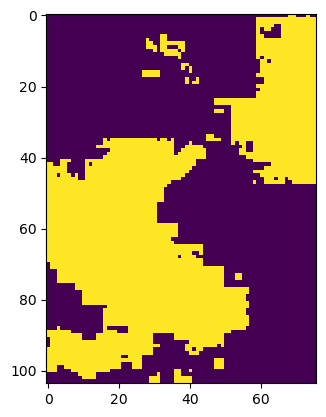

<AxesSubplot:>

In [13]:
a = np.array(pred_22)
pred_22 = a.reshape(104,76)

img = np.array(pred_22, dtype=np.uint8)
type(img[0,0])
img = img*255

print(img[0,40],pred_22[0,40])
#print(img[25,0],pred_22[150,0])
#print(img[0,6],pred_22[0,6])

img3 = Image.fromarray(img)
img3.save('22_14band_svm.png')
show(img3)